# Predição de casos de Covid-19 para a cidade de Guanambi
Dataset: https://brasil.io/dataset/covid19/caso_full/?search=&epidemiological_week=&date=&order_for_place=&state=&city=Guanambi&city_ibge_code=&place_type=city&last_available_date=&is_last=&is_repeated=False

In [445]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [446]:
dataset = pd.read_csv('/content/covid19-d71f6e63a8e44afc97651234b95642de.csv')

In [447]:
X = dataset.iloc[:,[2]].values.astype(float)
y = dataset.iloc[:,[7]].values.astype(float)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


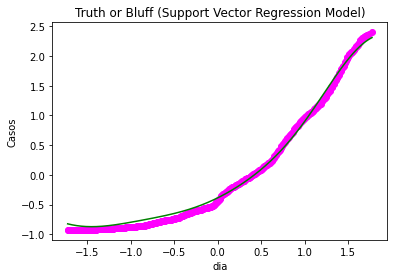

In [448]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Visualizando Regressão dos Resultados ')
plt.xlabel('dia')
plt.ylabel('Casos')
plt.show()

#5 Prevendo novos resultados

In [449]:
# Aqui prevemos os próximos resultados informando o numero relativo ao dia conrrespondente a tabela. Nesse caso 463 corresponde ao dia 2021-07-29
y_pred = sc_y.inverse_transform((regressor.predict(sc_X.transform(np.array([[469]])))))

In [451]:
# A saída dará a previsão de numero de infectados para a cidade de Guanambi
y_pred

array([10386.16863655])